In [1]:
# Import necessary libraries.
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# Define the keyword to search.
keyword = 'eth'

In [3]:
# Perform news scraping from Yahoo and extract the result into Pandas dataframe. 
news_data = []
for page in (0,21,41):
    url = 'https://news.search.yahoo.com/search?q={}&b={}'.format(keyword,page)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for news_item in soup.find_all('div', class_='NewsArticle'):
        news_title = news_item.find('h4').text
        news_source = news_item.find('span','s-source').text
        news_description = news_item.find('p','s-desc').text
        news_link = news_item.find('a').get('href')
        news_time = news_item.find('span', class_='fc-2nd').text
        # Perform basic clean text.
        news_time = news_time.replace('·', '').strip()
        news_title = news_title.replace('•', '').strip()
        news_data.append([news_title, news_source, news_description, news_link, news_time])

news_data_df = pd.DataFrame(news_data, columns=['Title','Source','Description','Link','Time'])

In [4]:
# Display header of dataframe.
news_data_df.head()

,Title,Source,Description,Link,Time
0,"Ethereum price set to test $2,250 before ETH m...",The Forex Market,Ethereum price action may complete a move that...,https://www.fxstreet.com/cryptocurrencies/news...,7 hours ago
1,Crypto Crash: Why is cryptocurrency market cra...,MSN News,Crypto Crash: Here's why global cryptocurrency...,https://www.msn.com/en-in/money/markets/crypto...,26 minutes ago
2,Crypto Prices Slump Further Over Weekend. Will...,Motley Fool,"Crypto prices continued to drop this weekend, ...",https://www.fool.com/the-ascent/cryptocurrency...,7 hours ago
3,"ETH Heads Top Holdings, Are HODLers Prepping f...",Investing.com,Analysts predicted that the ETH price could re...,https://www.investing.com/news/cryptocurrency-...,4 days ago
4,"$2,700 ETH Support Level Holds Strong and May ...",Investing.com,There may not be enough sell pressure for ETH ...,https://www.investing.com/news/cryptocurrency-...,3 days ago


In [5]:
# Export dataframe to csv file.
news_data_df.to_csv(r'.\data\news_data_df.csv', index=False, encoding="utf-8-sig")

In [6]:
# Import necessary libraries
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [7]:
# Define the service key and endpoint of Azure Text Analytics
key = "PLEASE_ENTER_YOUR_OWNED_AZURE_TEXT_ANALYTICS_SERVICE_KEY"
endpoint = "https://PLEASE_ENTER_YOUR_OWNED_AZURE_TEXT_ANALYTICS_INSTANCE_NAME.cognitiveservices.azure.com/"

In [8]:
# Initialize Azure Text Analytics client.
ta_credential = AzureKeyCredential(key)
text_analytics_client = TextAnalyticsClient(
        endpoint=endpoint, 
        credential=ta_credential)
client = text_analytics_client

In [9]:
# Perform sentiment analysis of news description and extract the result into Pandas dataframe. 
news_data_sentiment = []
for index, headers in news_data_df.iterrows():
    news_data_title = str(headers['Title'])
    print("News Title Content: {}".format(news_data_title))
    news_data_description = str(headers['Description'])
    print("News Description Content: {}".format(news_data_description))
    documents = [news_data_description]
    response = client.analyze_sentiment(documents=documents, language="en")[0]
    sentiment = response.sentiment
    print("Sentiment of Description Content: {}".format(sentiment))
    news_data_source = str(headers['Source'])
    print("News Source: {}".format(news_data_source))
    news_data_link = str(headers['Link'])
    print("News Link: {}".format(news_data_link))
    news_data_time = str(headers['Time'])
    print("News Time: {}".format(news_data_time))
    news_data_sentiment.append([news_data_title, news_data_description, sentiment,
                                news_data_source, news_data_link, news_data_time])

news_data_sentiment_df = pd.DataFrame(news_data_sentiment, columns=['Title', 'Description', 'Sentiment',
                                                                    'Source', 'Link', 'Time'])

News Title Content: Ethereum price set to test $2,250 before ETH moves even lower
News Description Content: Ethereum price action may complete a move that has only occurred twice in its history. Ethereum... 
Sentiment of Description Content: neutral
News Source: The Forex Market
News Link: https://www.fxstreet.com/cryptocurrencies/news/ethereum-price-set-to-test-2-250-before-eth-moves-even-lower-202205090017
News Time: 7 hours ago
News Title Content: Crypto Crash: Why is cryptocurrency market crashing? Check top 10 crypto prices today
News Description Content: Crypto Crash: Here's why global cryptocurrency market is crashing? Check top 10 crypto prices today... 
Sentiment of Description Content: negative
News Source: MSN News
News Link: https://www.msn.com/en-in/money/markets/crypto-crash-why-is-cryptocurrency-market-crashing-check-top-10-crypto-prices-today/ar-AAX3MB3
News Time: 26 minutes ago
News Title Content: Crypto Prices Slump Further Over Weekend. Will Crypto Crash Continue?
Ne

Sentiment of Description Content: negative
News Source: Benzinga
News Link: https://www.benzinga.com/markets/cryptocurrency/22/05/26950609/with-the-eth-merge-just-around-the-corner-should-you-buy-the-dip
News Time: 6 days ago
News Title Content: Experts Predict Ethereum to Double in Price by the End of 2022 By DailyCoin
News Description Content: Ethereum (ETH) had a very successful run in late 2021, but ETH is yet to see any significant... 
Sentiment of Description Content: negative
News Source: Investing.com
News Link: https://www.investing.com/news/cryptocurrency-news/experts-predict-ethereum-to-double-in-price-by-the-end-of-2022-2817135
News Time: 5 days ago
News Title Content: Crypto Whale Just Moved $37M Worth Of Ethereum Off Gemini - Benzinga
News Description Content: What happened: An Ethereum (CRYPTO: ETH) whale sent $37,026,175 worth of Ethereum off Gemini. The ETH address associated with this transaction has been identified as: 0x96ec13657d2a31b955fd75f5b5de70cbf5954db7 
Sent

In [10]:
# Display header of dataframe.
news_data_sentiment_df.head()

,Title,Description,Sentiment,Source,Link,Time
0,"Ethereum price set to test $2,250 before ETH m...",Ethereum price action may complete a move that...,neutral,The Forex Market,https://www.fxstreet.com/cryptocurrencies/news...,7 hours ago
1,Crypto Crash: Why is cryptocurrency market cra...,Crypto Crash: Here's why global cryptocurrency...,negative,MSN News,https://www.msn.com/en-in/money/markets/crypto...,26 minutes ago
2,Crypto Prices Slump Further Over Weekend. Will...,"Crypto prices continued to drop this weekend, ...",negative,Motley Fool,https://www.fool.com/the-ascent/cryptocurrency...,7 hours ago
3,"ETH Heads Top Holdings, Are HODLers Prepping f...",Analysts predicted that the ETH price could re...,neutral,Investing.com,https://www.investing.com/news/cryptocurrency-...,4 days ago
4,"$2,700 ETH Support Level Holds Strong and May ...",There may not be enough sell pressure for ETH ...,negative,Investing.com,https://www.investing.com/news/cryptocurrency-...,3 days ago


In [11]:
# Export dataframe to csv file.
news_data_sentiment_df.to_csv(r'.\data\news_data_sentiment_df.csv', index=False, encoding="utf-8-sig")

<AxesSubplot:ylabel='Description'>

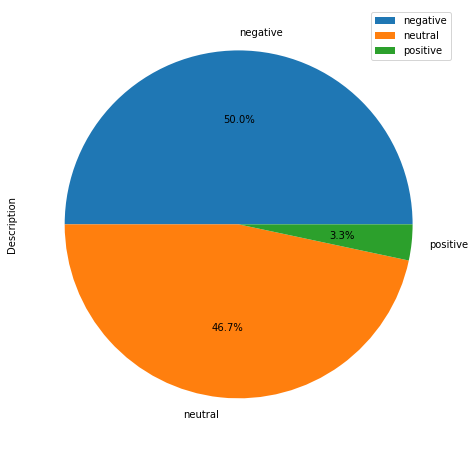

In [15]:
# Visualize news description sentiment by pie chart.
news_data_sentiment_df.groupby(['Sentiment']).count().plot(kind='pie', y='Description', figsize=(8,8), autopct='%1.1f%%')

In [13]:
news_data_sentiment_df

,Title,Description,Sentiment,Source,Link,Time
0,"Ethereum price set to test $2,250 before ETH m...",Ethereum price action may complete a move that...,neutral,The Forex Market,https://www.fxstreet.com/cryptocurrencies/news...,7 hours ago
1,Crypto Crash: Why is cryptocurrency market cra...,Crypto Crash: Here's why global cryptocurrency...,negative,MSN News,https://www.msn.com/en-in/money/markets/crypto...,26 minutes ago
2,Crypto Prices Slump Further Over Weekend. Will...,"Crypto prices continued to drop this weekend, ...",negative,Motley Fool,https://www.fool.com/the-ascent/cryptocurrency...,7 hours ago
3,"ETH Heads Top Holdings, Are HODLers Prepping f...",Analysts predicted that the ETH price could re...,neutral,Investing.com,https://www.investing.com/news/cryptocurrency-...,4 days ago
4,"$2,700 ETH Support Level Holds Strong and May ...",There may not be enough sell pressure for ETH ...,negative,Investing.com,https://www.investing.com/news/cryptocurrency-...,3 days ago
5,ETH Whale Wallet ‘Bonobo’ Acquires $3.2M APE,ETH Whale Wallet ‘Bonobo’ Acquires $3.2M APE,neutral,Investing.com,https://in.investing.com/news/eth-whale-wallet...,2 days ago
6,‘Smart money’ is staking ETH on rocket pool an...,Highly successful cryptocurrency traders have ...,positive,The Forex Market,https://www.fxstreet.com/cryptocurrencies/news...,5 days ago
7,"Robinhood Lists 2 New Bitcoin (BTC), Ethereum ...",Popular retail brokerage Robinhood Markets Inc...,neutral,Benzinga,https://www.benzinga.com/markets/cryptocurrenc...,21 minutes ago
8,Forex Today: Dollar benefits from risk aversio...,The risk-averse market atmosphere is helping t...,negative,The Forex Market,https://www.fxstreet.com/news/forex-today-doll...,25 minutes ago
9,Understanding staking pools: The pros and cons...,A staking pool is a tool that allows multiple ...,neutral,The Forex Market,https://www.fxstreet.com/cryptocurrencies/news...,4 hours ago


In [14]:
news_data_sentiment_df.loc[news_data_sentiment_df['Sentiment'] == 'positive']

,Title,Description,Sentiment,Source,Link,Time
6,‘Smart money’ is staking ETH on rocket pool an...,Highly successful cryptocurrency traders have ...,positive,The Forex Market,https://www.fxstreet.com/cryptocurrencies/news...,5 days ago
